# Workflow **Global Life Expectancy**

## **Load**

## Data: **Global Life Expectancy**

In [171]:
filename = 'Data_WHO_LifeExpectancy.csv'

import_data = pd.read_csv(filename,
                       skiprows = 4)

In [172]:
import_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662,66.074,66.444,66.787,67.113,67.435,...,75.158,75.299,75.441,75.583,75.725,75.868,76.010,NaN,NaN,NaN
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.446,32.962,33.471,33.971,34.463,34.948,...,61.553,62.054,62.525,62.966,63.377,63.763,64.130,NaN,NaN,NaN
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.524,37.811,38.113,38.430,38.760,39.102,...,56.330,57.236,58.054,58.776,59.398,59.925,60.379,NaN,NaN,NaN
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.283,63.301,64.190,64.914,65.463,65.850,...,76.914,77.252,77.554,77.813,78.025,78.194,78.333,NaN,NaN,NaN
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [173]:
lifexp_globe = np.array(import_data['2017'])

lifexp_globe = lifexp_globe[~np.isnan(lifexp_globe)]

lifexp_globe = np.mean(lifexp_globe)
lifexp_globe

72.32120285275374

## Data: **Musician Life Expectancy**

In [174]:
# module needed to handle jsons
import json

# module needed to draw random samples
import random

# module needed to handle arrays
import numpy as np

# modules needed for graphing
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
with open('musician_age_at_death.json', 'r') as fp:
    data = json.load(fp)

In [176]:
lifexp_music = np.array(list(data.values()))

lifexp_music = lifexp_music[lifexp_music >= 15]  # source of variation

## Analysis: **Hypthesis Test**

Null Hypothesis: Musicians have an average life expectancy

In [177]:
lifexp_globe

72.32120285275374

In [178]:
np.mean(lifexp_music)

66.57464019329761

In [179]:
# calculate the observed test statistic
diff_observed = diff_from_single(lifexp_music)
diff_observed

5.745359806702382

In [187]:
# shift the musician dataset so that the mean is that of globe's
music_shifted = lifexp_music - np.mean(lifexp_music) + lifexp_globe

# draw bootstrap replicates (test statistic) from shifted dataset
bs_replicates = draw_bs_reps(music_shifted, diff_from_single, 10000)  # see dependencies for function

# calculate the p-value
p_value = np.sum(bs_replicates >= diff_observed) / len(bs_replicates)
p_value

0.0

## Visual: **ECDF**

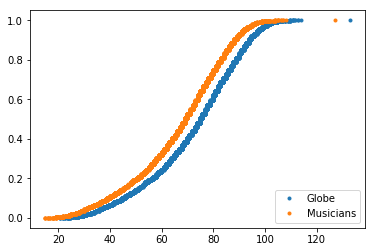

In [153]:
# see dependencies for ecdf

# Generate CDFs
x_globe, y_globe = ecdf(music_shifted)
x_music, y_music = ecdf(lifexp_music)

# Plot CDFs
_ = plt.plot(x_globe, y_globe, marker = '.', linestyle = 'none')
_ = plt.plot(x_music, y_music, marker = '.', linestyle = 'none')

# Make a legend and show the plot
_ = plt.legend(('Globe', 'Musicians'), loc='lower right')
plt.show()

## Visual: **Histograms**

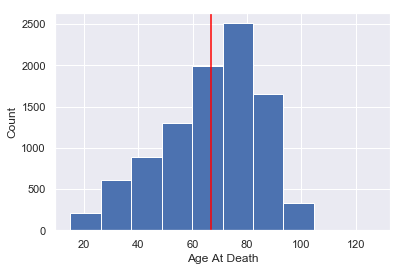

In [189]:
# Define plot parameters
sns.set()
_ = plt.hist(lifexp_music, bins = 10)  # plt.hist will return three arrays, only want plot so use dummy variable 
_ = plt.axvline(x= np.mean(lifexp_music), color = "red")
_ = plt.ylabel('Count')
_ = plt.xlabel('Age At Death')

# Show the plot
plt.show()

### Dependencies

In [ ]:
import pandas as pd  # needed for dataframes / reading data
import numpy as np  # needed for arrays
import seaborn as sns  # needed for histograms

In [57]:
def ecdf(data):
    """
    Compute ECDF for a one-dimensional array of measurements
    """
    
    # Number of data points: n
    n = len(data)
    
    # sorted values
    x = np.sort(data)
    
    # evenly spaced datapoints with the maximum of 1
    y = np.arange(1, n+1) / n
    
    return x,y

In [60]:
# v001

def array_details(data, array_details = {}):
    """
    Return details about each column in a dataframe
    """
    
    import numpy as np

    array_type = type(data[0])
    array_count = len(data)
    array_miss = np.count_nonzero(~np.isnan(data))
    array_num_unique = len(np.unique(data))  # how many unique values? 
    array_min = np.min(data)  # minimum
    array_max = np.max(data)  # maximum
    array_mean = np.mean(data)  # average
    array_std = np.std(data)  # standard deviation
    
    array_details_keys = ['Type','Count', 'Miss','Num_Uniq','Min','Max','Mean','Std']
    array_details_values = [array_type, 
                            array_count, 
                            array_miss, 
                            array_num_unique,
                           array_min,
                           array_max,
                           array_mean,
                           array_std]
    
    array_details = dict(zip(array_details_keys, array_details_values))
    
    return array_details

In [146]:
# test statistic is the mean of the bootstrap sample minus Newcomb's value
def diff_from_single(data, single = 72.32):
    """
    Find difference in mean of data from a single mean observation
    """
    return abs(single - np.mean(data))

In [119]:
def draw_bs_reps(data, func, size=1):
    """
    Draw bootstrap replicates.
    """

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [121]:
def bootstrap_replicate_1d(data, func):
    """
    Generate bootstrap replicate of 1D data.
    """
    
    bs_sample = np.random.choice(data, len(data))
    
    return func(bs_sample)